# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:50px 40px;">Final Project - Nutritional Data Analysis</p>

<img src="https://github.com/JordanMcMullen361/Nutritional-Data/blob/main/files/Food1.png?raw=true">

<p style="font-family:arial;color:#000000;font-size:150%;text-align:left;border-radius:40px 40px;">In this project I have explored a nutrional value dataset. I have explored the data and using supervised learning to predict the calorie count in ranges of foods using their primary components. I have used KNN to predict calorie ranges along with finding which component has the strongest ability to predict. With the strongest predictors I have used a linear regression model to make predictions.
    
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">TABLE OF CONTENTS</p> 

* [1. PROBLEM STATEMENT](#1)
    
* [2. IMPORTING LIBRARIES](#2)
    
* [3. LOADING DATA](#3)
    
* [4. DATA CLEANING](#4)
    
* [5. DATA EXPLORATION](#5)   
    
* [6. HYPOTHESES TESTING](#6) 
      
* [7. MODEL SELECTION](#7)
 
* [8. CONCLUSION](#9)

<a id="1"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">PROBLEM STATEMENT</p>
The aim of this research is to see if by looking at the key nutritional components of food can the number of calories be predicted and if so which nutritional component has the best ability to do so.
### Hypotheses
* Can the number of calories be predicted using if the key components of fat/protein/sugar/carbohydrate/water are known?
* Which food component has the greatest correlation and ability to predict the calories in food?

<a id="2"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">IMPORTING LIBRARIES</p>

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression as linreg
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


<a id="3"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">LOADING DATA</p>


https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products/data

Nutritional values for common foods and products

This data contains many different foods and the nutritional contents for each

I chose this topic as i have recently finished a degree in Food Science

In [2]:
path = str(Path('C://Users//GGPC//Documents//coding//GA//DATA'))
os.chdir(path)
os.getcwd()

df = pd.read_csv(path + '//nutrition.csv')

In [3]:
df.dtypes

Unnamed: 0       int64
name            object
serving_size    object
calories         int64
total_fat       object
                 ...  
alcohol         object
ash             object
caffeine        object
theobromine     object
water           object
Length: 77, dtype: object

In [4]:
df.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [6]:
df.shape

(8789, 77)

In [7]:
df.describe()

,Unnamed: 0,calories,lucopene
count,8789.000000,8789.000000,8789.0
mean,4394.000000,226.283878,0.0
std,2537.310091,169.862001,0.0
min,0.000000,0.000000,0.0
25%,2197.000000,91.000000,0.0
50%,4394.000000,191.000000,0.0
75%,6591.000000,337.000000,0.0
max,8788.000000,902.000000,0.0


<a id="4"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">DATA CLEANING</p>

Several columns to be removed as not being used
1. first column as it is just a id number
2. Serving size is always at 100g
3. lucopene is always at zero

Need to fill in any nulls

Identify and remove any unwated duplicates

Change the columns variables from object into float values.

Need to remove the measurment unit (g, mg, mcg) and add to column name = i will do this as needed

Need to group the calorie in to groups by standard deviation(169) group 1 = 0-200, 2 = 201-400, 3 = 401-600, 4 = 601-800,
5 = 801-1000.

Feature selection so that only the wanted columns are used

In [8]:
# Removing unwanted columns

df = df.iloc[: , 1:]
df = df.drop(columns = ['lucopene'])
df = df.drop(columns = ['serving_size'])

name = df['name']
df = df.drop(columns = ['name'])

df

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,6.422 mg,0.356 mg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,7.680 mg,0.580 mg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,6.550 mg,0.520 mg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,6.720 mg,0.355 mg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


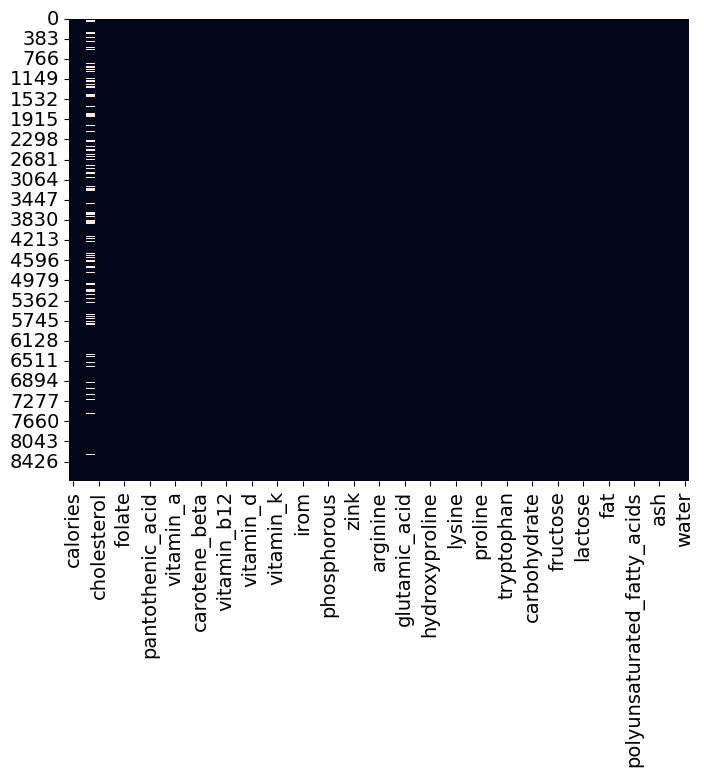

In [9]:
#looking at if there are any null values, there are many in the cholesterol column

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [10]:
#removing units from each input and converting to float values for entire df

df = df.astype(str)

def remove_units_and_convert(column_name):
    df[column_name] = df[column_name].str.replace('[a-zA-Z]+', '', regex=True) # Replace any non num charater with nothing
    df[column_name] = df[column_name].replace('', '0')  # Replace empty strings with '0'
    df[column_name] = df[column_name].astype(float)

# Loop through all columns and apply the conversion
for col in df.columns:
    remove_units_and_convert(col)
    
df

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,381.0,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,25.0,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,125.0,3.5,1.4,62.0,54.0,64.5,4.0,0.0,6.422,0.356,...,3.50,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51
8785,206.0,8.9,3.9,109.0,50.0,0.0,0.0,0.0,7.680,0.580,...,8.86,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95
8786,277.0,23.0,12.0,78.0,39.0,0.0,1.0,0.0,6.550,0.520,...,22.74,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80
8787,121.0,3.0,1.1,60.0,53.0,64.2,4.0,0.0,6.720,0.355,...,3.04,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43


In [11]:
#cheching if any nulls strill remain
df.isnull().sum()

calories         0
total_fat        0
saturated_fat    0
cholesterol      0
sodium           0
                ..
alcohol          0
ash              0
caffeine         0
theobromine      0
water            0
Length: 73, dtype: int64

In [12]:
#renaming some columns to include the untis in the name

df.rename(columns={'calories': 'calories_100g',
                   'protein': 'protein_g',
                   'carbohydrate': 'carbohydrate_g',
                   'fiber': 'fiber_g',
                   'water': 'water_g',
                   'sugars': 'sugars_g',
                   'fat': 'fat_g'}, inplace=True)

In [13]:
#Looks to see if there are any duplicates in the data
df[df.duplicated()]

,calories_100g,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,fat_g,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water_g
51,424.0,5.3,0.9,0.0,149.0,0.0,124.0,0.0,4.340,0.000,...,5.30,0.860,1.860,1.350,0.0,0.0,0.00,0.0,0.0,2.00
1750,475.0,20.0,10.0,0.0,324.0,0.0,59.0,0.0,2.100,0.000,...,20.20,10.300,5.200,1.100,0.0,0.0,0.00,0.0,0.0,2.50
1905,81.0,2.5,1.2,51.0,41.0,37.6,8.0,0.0,2.495,0.083,...,2.52,1.180,0.950,0.160,51.0,0.0,0.57,0.0,0.0,82.44
2209,469.0,19.0,6.5,0.0,267.0,0.0,83.0,0.0,2.900,0.000,...,19.30,6.500,6.400,1.400,0.0,0.0,0.00,0.0,0.0,2.40
2438,197.0,9.0,1.7,0.0,468.0,0.0,23.0,0.0,2.170,0.455,...,8.99,1.689,2.035,5.029,0.0,0.0,2.08,0.0,0.0,59.85
2458,507.0,26.0,6.1,1.0,753.0,0.0,125.0,0.0,4.400,0.000,...,26.30,6.100,7.200,12.600,1.0,0.0,0.00,0.0,0.0,2.30
2729,515.0,24.0,11.0,0.0,111.0,0.0,0.0,0.0,0.065,0.000,...,24.18,10.501,8.312,2.670,0.0,0.0,0.30,0.0,0.0,1.12
3010,541.0,30.0,15.0,0.0,122.0,0.0,0.0,0.0,0.000,0.430,...,30.42,15.299,9.462,2.274,0.0,0.0,1.33,0.0,0.0,1.37
3035,502.0,24.0,8.0,7.0,262.0,0.0,85.0,0.0,2.800,0.000,...,24.40,8.000,5.500,9.000,7.0,0.0,0.00,0.0,0.0,3.40
3190,463.0,18.0,5.8,1.0,493.0,0.0,60.0,0.0,2.100,0.000,...,18.00,5.800,4.200,6.700,1.0,0.0,0.00,0.0,0.0,3.50


In [14]:
#dropping duplicates
df = df.drop_duplicates()

In [15]:
#creating a new column which groups the items by the the calories in ranges of 200
#the restulting column is int value and now a ordinal categorical variable as needed for modeling

calorie_ranges = [0, 200, 400, 600, 800, 1000]

df['calorie_range'] = pd.cut(df['calories_100g'], bins=calorie_ranges, labels=False, right=False)

label_mapping = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5}
df['calorie_range'] = df['calorie_range'].map(label_mapping)
df['calorie_range'].fillna(0, inplace=True)
df['calorie_range'] = df['calorie_range'].astype(int)

In [16]:
#making a new df to only contain the columns wanted for exploring
main_df = ['calories_100g','calorie_range', 'protein_g', 'sugars_g','carbohydrate_g',
           'fat_g', 'water_g']
new_df = df[main_df]
new_df.describe()

,calories_100g,calorie_range,protein_g,sugars_g,carbohydrate_g,fat_g,water_g
count,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,226.081885,1.660682,11.348199,6.728935,22.083791,10.545130,54.151072
std,169.810299,0.832146,10.539750,13.698486,27.248852,15.839377,30.749150
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.000000,2.380000,0.000000,0.050000,0.940000,29.975000
50%,191.000000,1.000000,8.025000,0.480000,9.285000,5.100000,63.080000
75%,336.000000,2.000000,19.900000,5.952500,34.570000,13.667500,78.032500
max,902.000000,5.000000,88.320000,99.800000,100.000000,100.000000,100.000000


In [17]:
#creating 2 new df one contains only the calorie range the onther contains the feature columns

cal_range = df.calorie_range
feature_cols = ['protein_g', 'sugars_g','carbohydrate_g',
                'fat_g', 'water_g']
cols = df[feature_cols]
cols.head()

,protein_g,sugars_g,carbohydrate_g,fat_g,water_g
0,0.26,0.00,91.27,0.05,8.32
1,9.17,3.97,13.86,71.97,3.52
2,0.98,3.53,5.88,0.18,92.30
3,13.30,1.84,73.13,2.38,8.82
4,1.10,24.32,30.40,2.00,66.10


<a id="5"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">DATA EXPLORATION</p>

Here I am exploring the data using different types of EDA
- box plots
- displot/histogram
- scatterplot
- pairplot

In [18]:
#We can see here the uneven spread aoung the calorie ranges
cal_range.value_counts(normalize=True)

calorie_range
1    0.521500
2    0.334973
3    0.118138
5    0.013266
4    0.012123
Name: proportion, dtype: float64

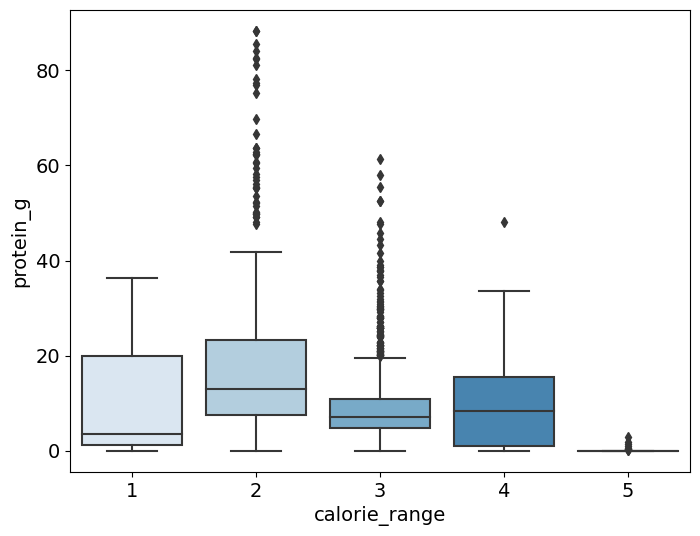

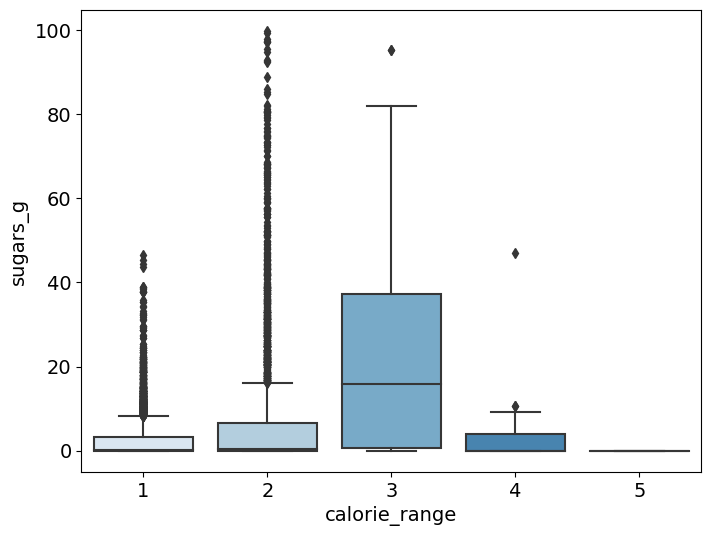

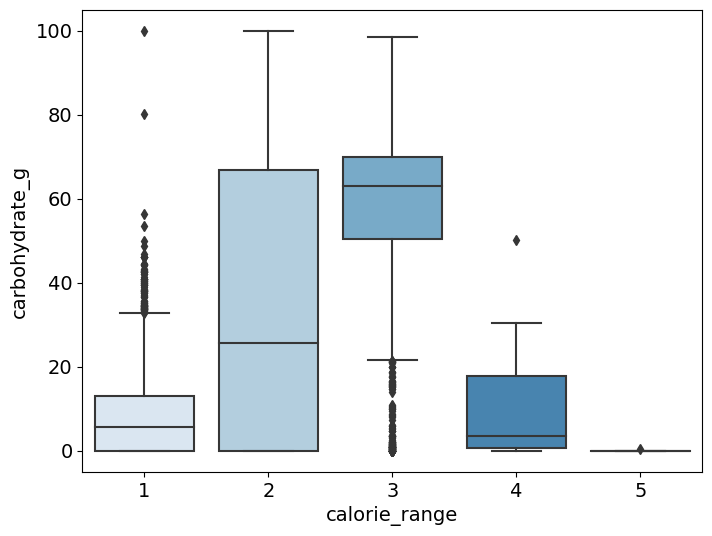

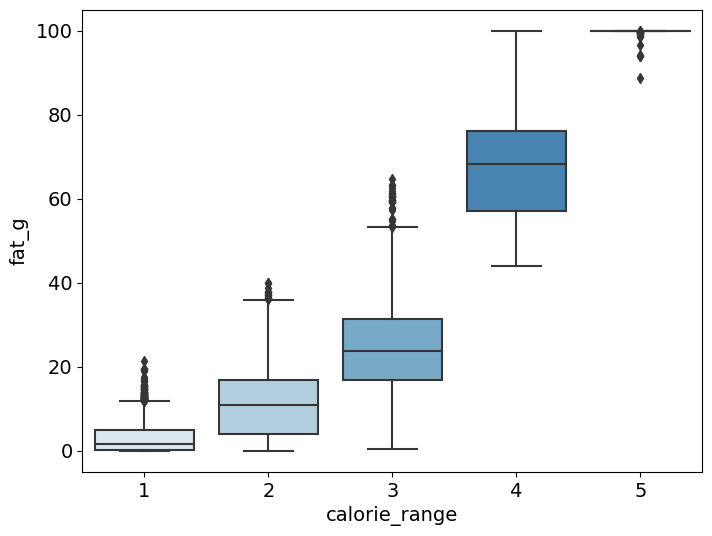

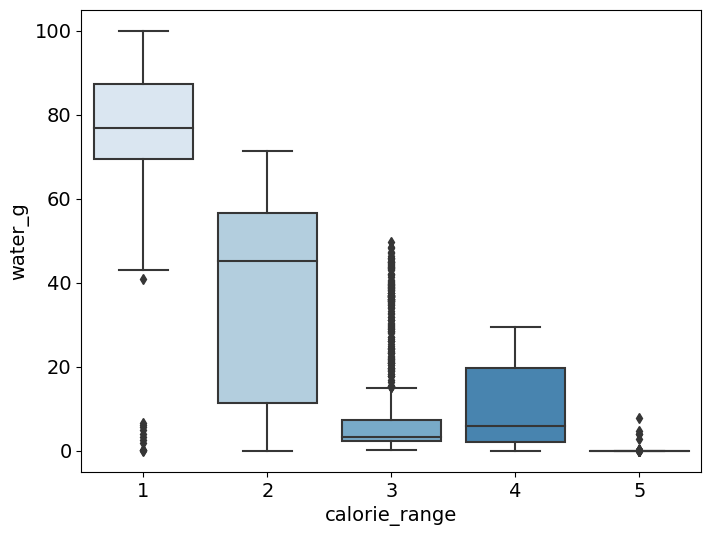

In [19]:
for x in cols:
    sns.boxplot(y=cols[x], x= cal_range , palette="Blues");
    plt.show()

### These histogram show that many of the food caontain zero of each component.
### We can also see that all components are positivly skewed

<Figure size 800x600 with 0 Axes>

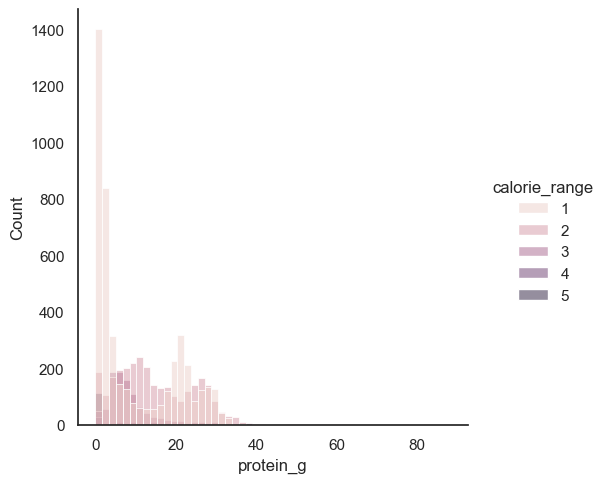

<Figure size 800x600 with 0 Axes>

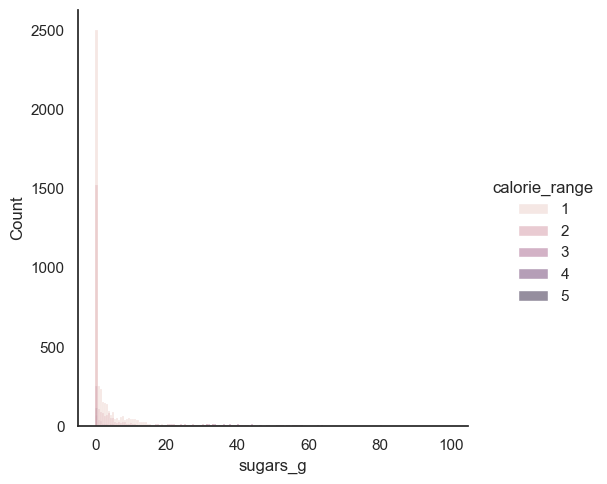

<Figure size 800x600 with 0 Axes>

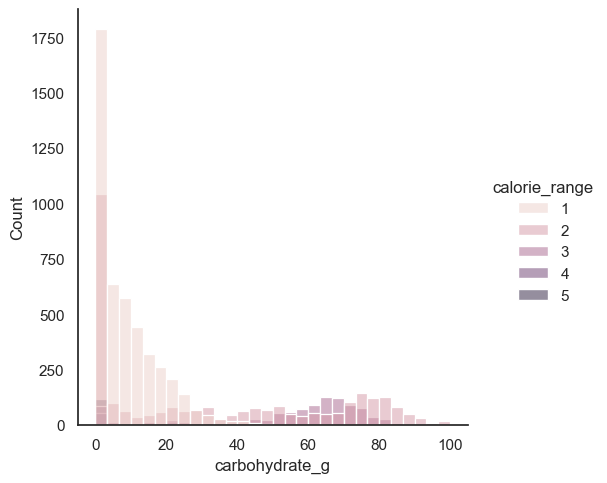

<Figure size 800x600 with 0 Axes>

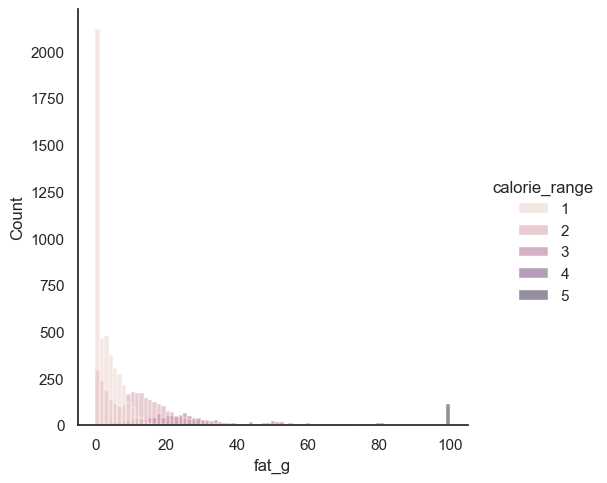

<Figure size 800x600 with 0 Axes>

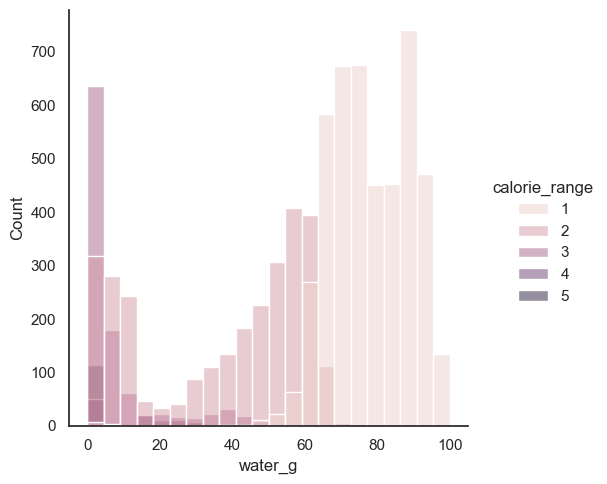

In [76]:
#plotting a hist plot for each column in the cols df using the cal ranges to group them

for x in cols:
    plt.figure()
    sns.displot(df, x = cols[x], hue = 'calorie_range')

In [21]:
#since the histogram were so heavily skewed i looked at the skew values and found all to be positive

skewValue = cols.skew(axis=1)

print("DataFrame:")
print(cols)

print("Skew:")
print(skewValue)  

DataFrame:
      protein_g  sugars_g  carbohydrate_g  fat_g  water_g
0          0.26      0.00           91.27   0.05     8.32
1          9.17      3.97           13.86  71.97     3.52
2          0.98      3.53            5.88   0.18    92.30
3         13.30      1.84           73.13   2.38     8.82
4          1.10     24.32           30.40   2.00    66.10
...         ...       ...             ...    ...      ...
8784      23.45      0.00            0.00   3.50    72.51
8785      29.59      0.00            0.00   8.86    59.95
8786      16.74      0.00            0.00  22.74    59.80
8787      23.37      0.00            0.00   3.04    73.43
8788      23.37      0.00            0.00   3.04    73.43

[8744 rows x 5 columns]
Skew:
0       2.193305
1       2.121000
2       2.218769
3       2.100378
4       1.015461
          ...   
8784    1.758182
8785    1.243000
8786    1.361005
8787    1.770786
8788    1.770786
Length: 8744, dtype: float64


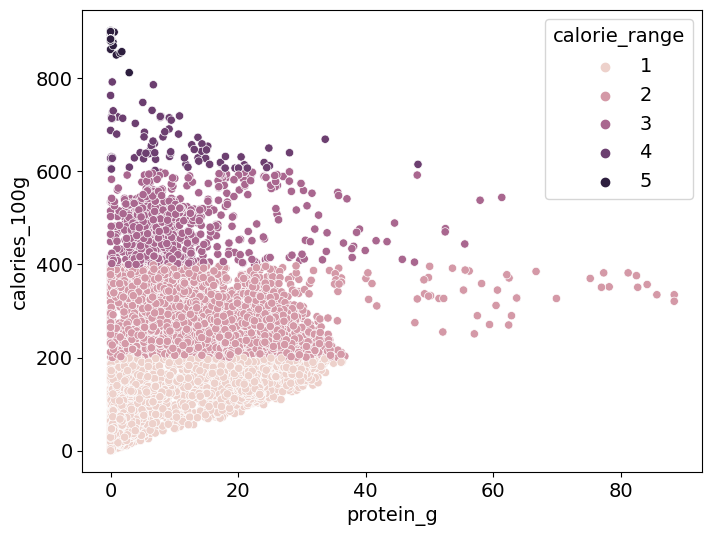

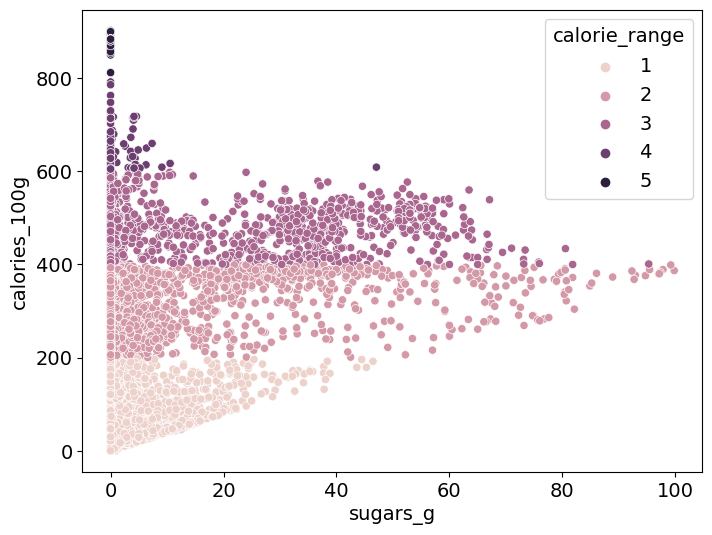

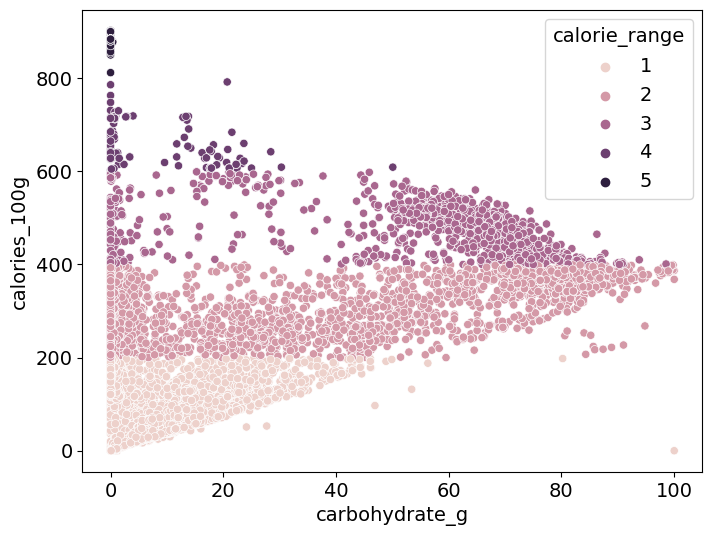

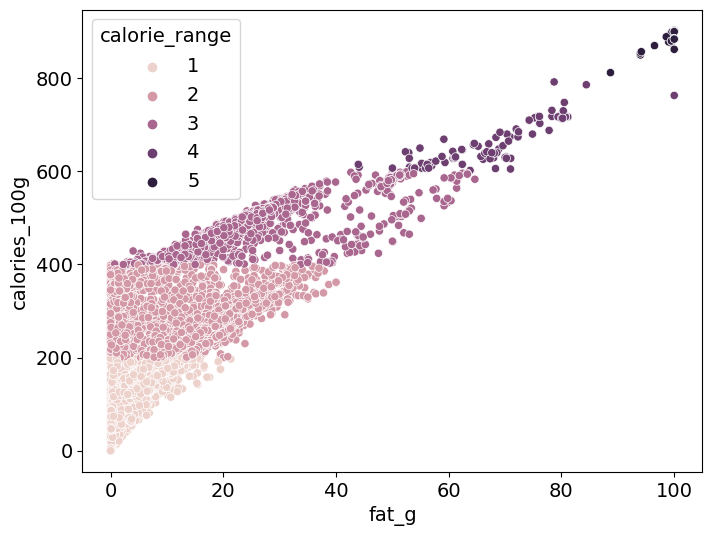

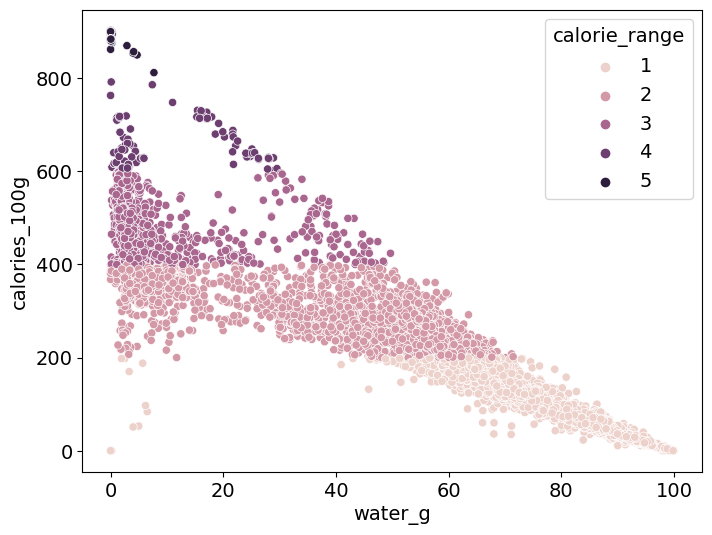

In [22]:
#scatter plots for columns in cols agaisnt the calorie_100g and grouped by cal_range

for x in cols:
    plt.figure()
    sns.scatterplot(data = df, x = x, y = 'calories_100g', hue = cal_range)

<Axes: >

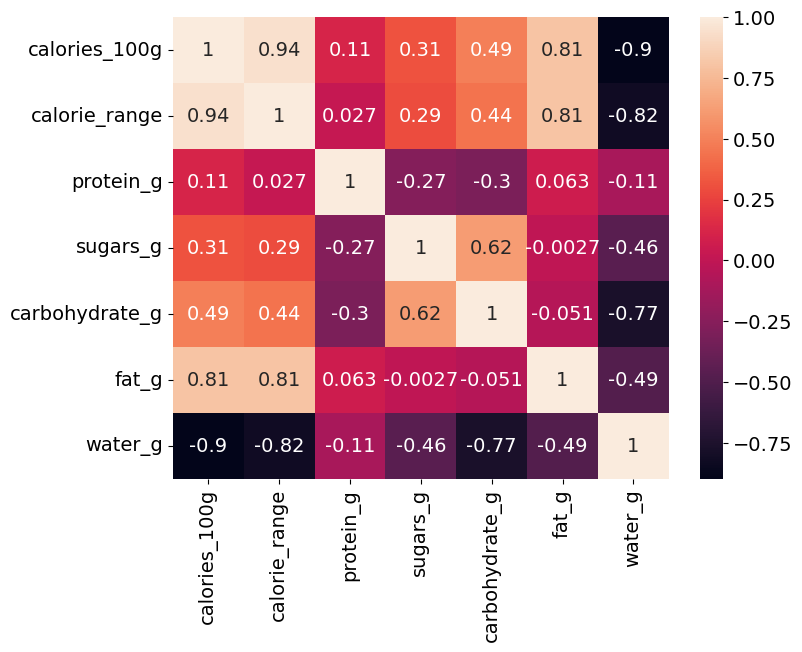

In [23]:
#correlation matrix whcih shows fat has the highest cor with cal_ranges folowwed by water with a neg cor

cor_matrix = new_df.corr()
sns.heatmap(cor_matrix, annot = True)

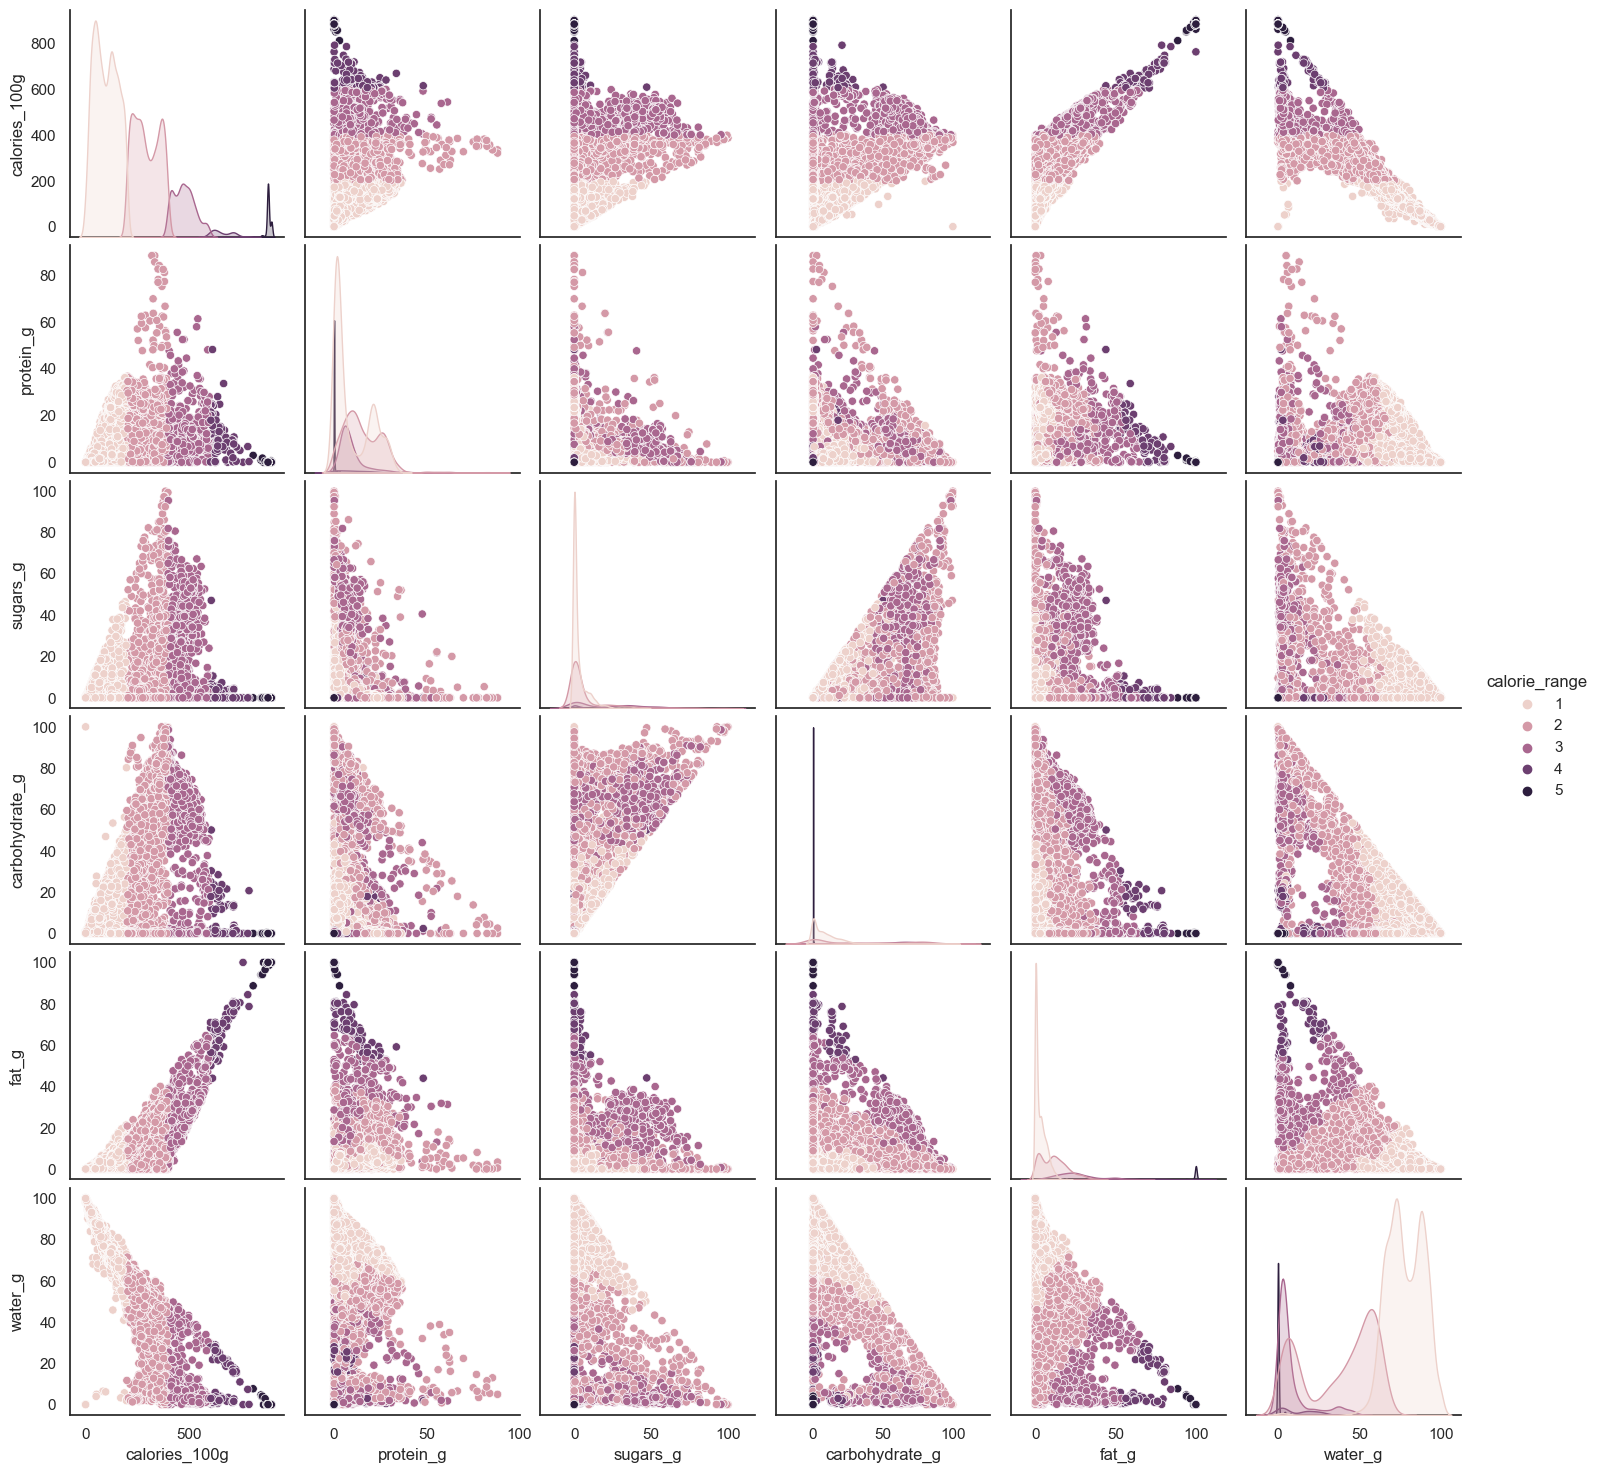

In [24]:
#pair plot showing the relationship of each veriable

sns.set_theme(style='white')
sns.pairplot(new_df, hue = 'calorie_range')

### EDA Conclusion

* Positive skew on all components
* Positive linear relationship between fat and calories
* Negative linear relationship between water and calories

<a id="6"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">HYPOTHESIS TESTING</p>

Here loops were made to do some hypothesis testing on the featured columns.


In [25]:
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon

Anderson-Darling Normality Test

In [26]:
#Here i am testing for normalitywhich none of the features are 

for x in cols:
    data = cols[x]
    result = anderson(data)
    print(str(x) + ' stat=%.3f' % (result.statistic))
    for i in range(len(result.critical_values)):
         sl, cv = result.significance_level[i], result.critical_values[i]
         if result.statistic < cv:
             print('Probably Gaussian at the %.1f%% level' % (sl))
         else:
             print('Probably not Gaussian at the %.1f%% level' % (sl))
         print()

protein_g stat=294.198
Probably not Gaussian at the 15.0% level

Probably not Gaussian at the 10.0% level

Probably not Gaussian at the 5.0% level

Probably not Gaussian at the 2.5% level

Probably not Gaussian at the 1.0% level

sugars_g stat=1463.738
Probably not Gaussian at the 15.0% level

Probably not Gaussian at the 10.0% level

Probably not Gaussian at the 5.0% level

Probably not Gaussian at the 2.5% level

Probably not Gaussian at the 1.0% level

carbohydrate_g stat=759.934
Probably not Gaussian at the 15.0% level

Probably not Gaussian at the 10.0% level

Probably not Gaussian at the 5.0% level

Probably not Gaussian at the 2.5% level

Probably not Gaussian at the 1.0% level

fat_g stat=821.969
Probably not Gaussian at the 15.0% level

Probably not Gaussian at the 10.0% level

Probably not Gaussian at the 5.0% level

Probably not Gaussian at the 2.5% level

Probably not Gaussian at the 1.0% level

water_g stat=348.375
Probably not Gaussian at the 15.0% level

Probably not Gau

Spearman's Rank Correlation Test

In [27]:
#tesing for correlation using a spearmans text

cols2 = cols.columns

for i in range(len(cols2)):
    for j in range(i+1, len(cols2)):
        col1 = cols2[i]
        col2 = cols2[j]
        stat, p = spearmanr(df[col1], df[col2])
        print(f'Columns {col1} and {col2}: stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print()

Columns protein_g and sugars_g: stat=-0.436, p=0.000
Probably dependent

Columns protein_g and carbohydrate_g: stat=-0.405, p=0.000
Probably dependent

Columns protein_g and fat_g: stat=0.475, p=0.000
Probably dependent

Columns protein_g and water_g: stat=-0.304, p=0.000
Probably dependent

Columns sugars_g and carbohydrate_g: stat=0.673, p=0.000
Probably dependent

Columns sugars_g and fat_g: stat=-0.116, p=0.000
Probably dependent

Columns sugars_g and water_g: stat=-0.195, p=0.000
Probably dependent

Columns carbohydrate_g and fat_g: stat=-0.088, p=0.000
Probably dependent

Columns carbohydrate_g and water_g: stat=-0.474, p=0.000
Probably dependent

Columns fat_g and water_g: stat=-0.656, p=0.000
Probably dependent



Pearson's Correlation test

In [28]:
#againtesting fro correlation: found only sugar and fat to be inderpendant while the rest were dependant

for i in range(len(cols2)):
    for j in range(i+1, len(cols2)):
        col1 = cols2[i]
        col2 = cols2[j]
        stat, p = pearsonr(df[col1], df[col2])
        print(f'Columns {col1} and {col2}: stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print()


Columns protein_g and sugars_g: stat=-0.269, p=0.000
Probably dependent

Columns protein_g and carbohydrate_g: stat=-0.303, p=0.000
Probably dependent

Columns protein_g and fat_g: stat=0.063, p=0.000
Probably dependent

Columns protein_g and water_g: stat=-0.106, p=0.000
Probably dependent

Columns sugars_g and carbohydrate_g: stat=0.615, p=0.000
Probably dependent

Columns sugars_g and fat_g: stat=-0.003, p=0.804
Probably independent

Columns sugars_g and water_g: stat=-0.455, p=0.000
Probably dependent

Columns carbohydrate_g and fat_g: stat=-0.051, p=0.000
Probably dependent

Columns carbohydrate_g and water_g: stat=-0.773, p=0.000
Probably dependent

Columns fat_g and water_g: stat=-0.489, p=0.000
Probably dependent



t-test, Parametric Statistical Hypothesis Test

In [29]:
#t-test to see if the distributions are the same or not: found none the same

for i in range(len(cols2)):
    for j in range(i+1, len(cols2)):
        col1 = cols2[i]
        col2 = cols2[j]
        stat, p = ttest_ind(df[col1], df[col2])
        print(f'Columns {col1} and {col2}: stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
         print('Probably the same distribution')
        else:
         print('Probably different distributions')
        print()

Columns protein_g and sugars_g: stat=24.991, p=0.000
Probably different distributions

Columns protein_g and carbohydrate_g: stat=-34.360, p=0.000
Probably different distributions

Columns protein_g and fat_g: stat=3.947, p=0.000
Probably different distributions

Columns protein_g and water_g: stat=-123.133, p=0.000
Probably different distributions

Columns sugars_g and carbohydrate_g: stat=-47.079, p=0.000
Probably different distributions

Columns sugars_g and fat_g: stat=-17.041, p=0.000
Probably different distributions

Columns sugars_g and water_g: stat=-131.732, p=0.000
Probably different distributions

Columns carbohydrate_g and fat_g: stat=34.234, p=0.000
Probably different distributions

Columns carbohydrate_g and water_g: stat=-72.984, p=0.000
Probably different distributions

Columns fat_g and water_g: stat=-117.886, p=0.000
Probably different distributions



Wilcoxon Signed-Rank Test
Nonparametric

In [30]:
for i in range(len(cols2)):
    for j in range(i+1, len(cols2)):
        col1 = cols2[i]
        col2 = cols2[j]
        stat, p = wilcoxon(df[col1], df[col2])
        print(f'Columns {col1} and {col2}: stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
         print('Probably the same distribution')
        else:
         print('Probably different distributions')
        print()

Columns protein_g and sugars_g: stat=11090566.000, p=0.000
Probably different distributions

Columns protein_g and carbohydrate_g: stat=13545027.000, p=0.000
Probably different distributions

Columns protein_g and fat_g: stat=12835378.500, p=0.000
Probably different distributions

Columns protein_g and water_g: stat=1632251.000, p=0.000
Probably different distributions

Columns sugars_g and carbohydrate_g: stat=8924.500, p=0.000
Probably different distributions

Columns sugars_g and fat_g: stat=12977472.500, p=0.000
Probably different distributions

Columns sugars_g and water_g: stat=2180410.500, p=0.000
Probably different distributions

Columns carbohydrate_g and fat_g: stat=11547271.500, p=0.000
Probably different distributions

Columns carbohydrate_g and water_g: stat=8129500.500, p=0.000
Probably different distributions

Columns fat_g and water_g: stat=3188124.500, p=0.000
Probably different distributions



### Findings

* Anderson-Darling Normality Test found none of the components normally distributed
* Spearman's Rank Correlation Test found all components to be dependent on each other
* Pearson's Correlation test found all all the be dependant except for sugar and fat which were found to be independant
* t-test, Parametric Statistical Hypothesis Test found all components to be from different distributions
* Wilcoxon Signed-Rank Test Nonparametric found all components to be from different distributions

<a id="7"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">MODEL SELECTION</p>

## KNN

The first model I used was KNN. This supervised model looks at the labelled data and by looking at the neighbours for an unknown variable it can guess what it may be. 

This model requires to be fitted with an approriate K value. a higher k value can lead to a more over fitted modoel and too low K value can make the model under fitted. Both over and underfitting can lead to a ineffective model. 

Below I have fitted the KNN model and found prediction accuracy at 97%. I have also used this model to run an evaluation of the K value as well as looking at the K value against the error rate of the predictor to find the more appropriate K value.


In [31]:
#Starts with choosing the wanted features and target which were determined in EDA
F = cols
C = cal_range

#test train split where F and C will be loaded into the x train/test and ytreain/test. this split is 20% for testing.
X_train,X_test,y_train,y_test=train_test_split(F,C,test_size=0.20, random_state = 12)

# insatiate and fit the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#predict
y_pred=knn.predict(X_test)

print("Accuracy of test data: ", metrics.accuracy_score(y_test,y_pred).round(2))

Accuracy of test data:  0.97


In [35]:
#makeing a list of accuracy using k vlaues ranging from 1-25

k_range= range (1,26)
scores=[]
for k in k_range :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred).round(2))
print(scores)

[0.82, 0.82, 0.83, 0.82, 0.84, 0.83, 0.83, 0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85, 0.84, 0.84, 0.84, 0.85, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84]


Text(0, 0.5, 'Accuracy Score')

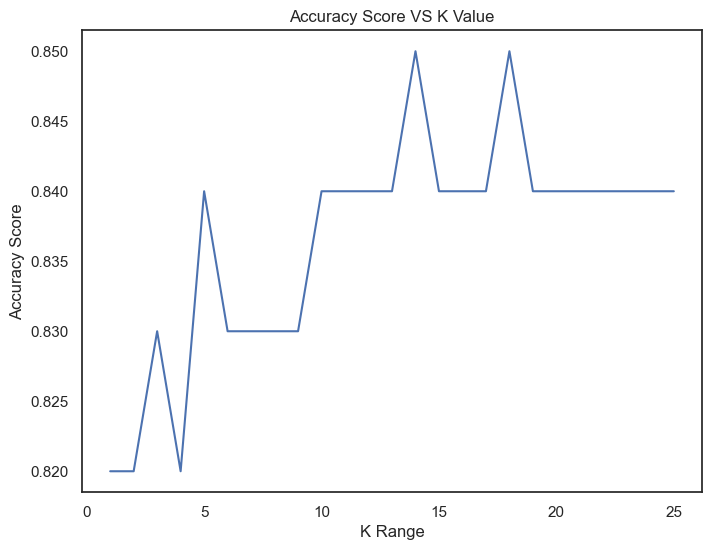

In [36]:
#creating a plot to see these accuracy scores agains the k range.
#this is to see which k value is the best fit for the model
plt.plot(k_range,scores)
plt.title('Accuracy Score VS K Value')
plt.xlabel('K Range')
plt.ylabel('Accuracy Score')

Text(0, 0.5, 'Error Rate')

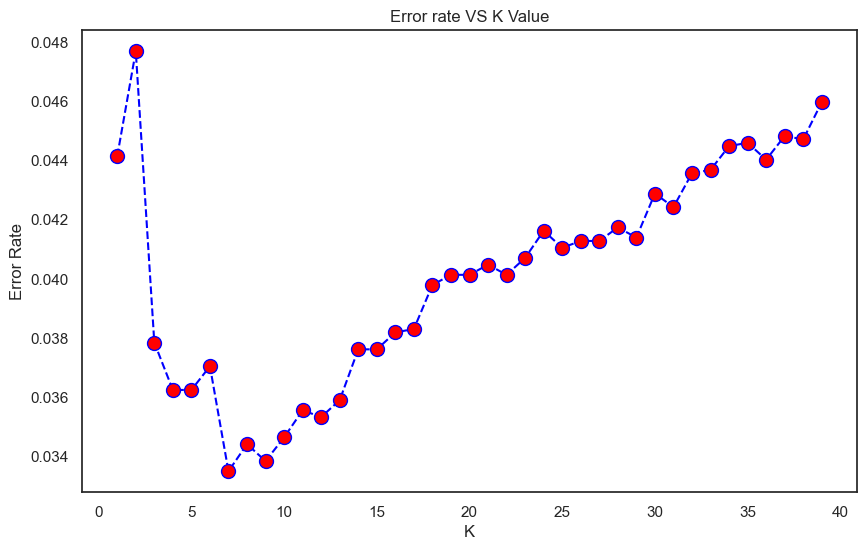

In [37]:
#Cross validation to see which k vaoue has the lowest error rate

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, F, C, cv=10)
    error_rate.append(1-score.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Using knn to get an acuracy to 0.97 when using the test rain slpit with a split size of 20% and the random state 12

In [32]:
#here i have made a function so i can see how model works. this taks a sample from the df then runs it throiugh the KNN model
#it then output the prediction aswell as the information of the sample taken so i can manually see it working

def Test_knn():
    # Sample the DataFrame
    sampled_data = new_df.sample()
    
    # Select the last 5 columns and convert them into a list of lists
    featured_columns = sampled_data.iloc[:, -5:].values.tolist()
    target = sampled_data.iloc[:, 1]
    
    F = cols
    C = cal_range

    X_train,X_test,y_train,y_test=train_test_split(F,C,test_size=0.33, random_state = 2)
    
    knn.fit(X_train,y_train)
    
    prediction = knn.predict(featured_columns)
    
    return prediction, target, featured_columns

Test_knn()

(array([1]),
 408    1
 Name: calorie_range, dtype: int32,
 [[22.77, 0.0, 0.0, 4.03, 72.87]])

### KNN Predictor Script

Here I have made a function that takes inputted values for the food components which will then return the predicted calorie range.

In [33]:
#this program allows for a user to input the value for food components then is returned a calorie range it me be.

def predict_from_input():
    #feature/target
    F = cols
    C = cal_range
    
    #test train split
    X_train,X_test,y_train,y_test=train_test_split(F,C,test_size=0.20, random_state = 2)
    
    #instantiate and fit model
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train)
    
    #retrieve user input
    user_input_values = []
    protein = input("Enter value for protien: ")
    user_input_values.append(float(protein))
    sugar = input("Enter value for sugar: ")
    user_input_values.append(float(sugar))
    carb = input("Enter value for carbohydrate: ")
    user_input_values.append(float(carb))
    fat = input("Enter value for fat: ")
    user_input_values.append(float(fat))
    water = input("Enter value for water: ")
    user_input_values.append(float(water))
    
    #gets the prediction
    prediction = knn.predict([user_input_values])
    
    #prints statement based on the prediction returned
    if prediction[0] ==1:
        print("This contains between 0-200 calories.")
    elif prediction[0] == 2:
        print("This contains between 201-400 calories.")
    elif prediction[0] == 3:
        print("This contains between 401-600 calories.")
    elif prediction[0] == 4:
        print("This contains between 601-800 calories.")
    elif prediction[0] == 5:
        print("This contains between 801-1000 calories.")
    else:
        print('This is super unhealthy')

predict_from_input()

Enter value for protien: 1
Enter value for sugar: 1
Enter value for carbohydrate: 1
Enter value for fat: 1
Enter value for water: 1
This contains between 0-200 calories.


#### Here I have made a loop to go through each combination of feature and return the accuracy So that I can see which are the more import features

In [34]:


# Iterate over each number of features (5, 4, 3, 2, 1)
for num_features in range(5, 0, -1):
    # make all possible combos of feature columns
    feature_combinations = itertools.combinations(cols, num_features)
    
    # Iterate over each combo of feature columns
    for feature_combo in feature_combinations:
        # Select the subset of feature columns
        X = df[list(feature_combo)]
        y = df['calorie_range']
        
        # Test train Plit
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
        
        # insatiate and fit the model
        knn = KNeighborsClassifier(n_neighbors=7)
        knn.fit(X_train, y_train)
        
        # Predict 
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy
        accuracy = metrics.accuracy_score(y_test, y_pred).round(2)
        
        # Print accuracy for current iteration
        print(f"Accuracy with {num_features} features {feature_combo}: {accuracy}")


Accuracy with 5 features ('protein_g', 'sugars_g', 'carbohydrate_g', 'fat_g', 'water_g'): 0.97
Accuracy with 4 features ('protein_g', 'sugars_g', 'carbohydrate_g', 'fat_g'): 0.96
Accuracy with 4 features ('protein_g', 'sugars_g', 'carbohydrate_g', 'water_g'): 0.95
Accuracy with 4 features ('protein_g', 'sugars_g', 'fat_g', 'water_g'): 0.97
Accuracy with 4 features ('protein_g', 'carbohydrate_g', 'fat_g', 'water_g'): 0.97
Accuracy with 4 features ('sugars_g', 'carbohydrate_g', 'fat_g', 'water_g'): 0.97
Accuracy with 3 features ('protein_g', 'sugars_g', 'carbohydrate_g'): 0.78
Accuracy with 3 features ('protein_g', 'sugars_g', 'fat_g'): 0.88
Accuracy with 3 features ('protein_g', 'sugars_g', 'water_g'): 0.89
Accuracy with 3 features ('protein_g', 'carbohydrate_g', 'fat_g'): 0.97
Accuracy with 3 features ('protein_g', 'carbohydrate_g', 'water_g'): 0.95
Accuracy with 3 features ('protein_g', 'fat_g', 'water_g'): 0.97
Accuracy with 3 features ('sugars_g', 'carbohydrate_g', 'fat_g'): 0.93
Ac

In [38]:
#looking at the accuracy of the classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.8364779874213837


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.94      0.95       906
           2       0.72      0.84      0.78       569
           3       0.68      0.46      0.55       239
           4       0.00      0.00      0.00        15
           5       0.80      1.00      0.89        20

    accuracy                           0.84      1749
   macro avg       0.63      0.65      0.63      1749
weighted avg       0.83      0.84      0.83      1749



In [40]:
# creating a confusion matrix
cf_matrix =confusion_matrix(y_test, y_pred)
cf_matrix

array([[856,  50,   0,   0,   0],
       [ 41, 478,  46,   3,   1],
       [  0, 125, 109,   1,   4],
       [  0,  10,   5,   0,   0],
       [  0,   0,   0,   0,  20]], dtype=int64)

<Axes: >

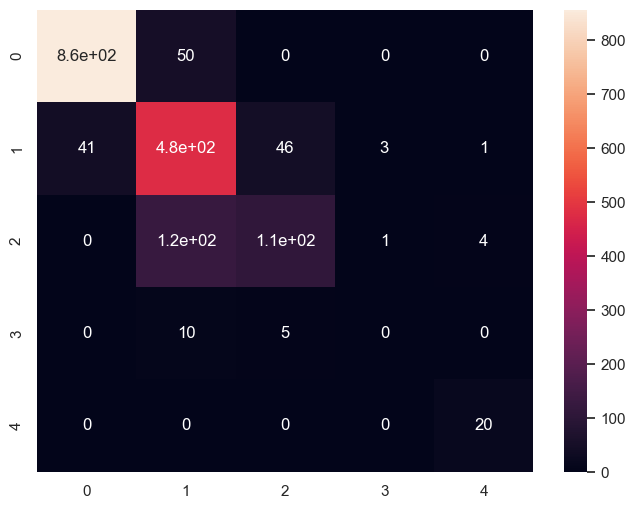

In [41]:
sns.heatmap(cf_matrix, annot=True)

Text(67.25, 0.5, 'actual')

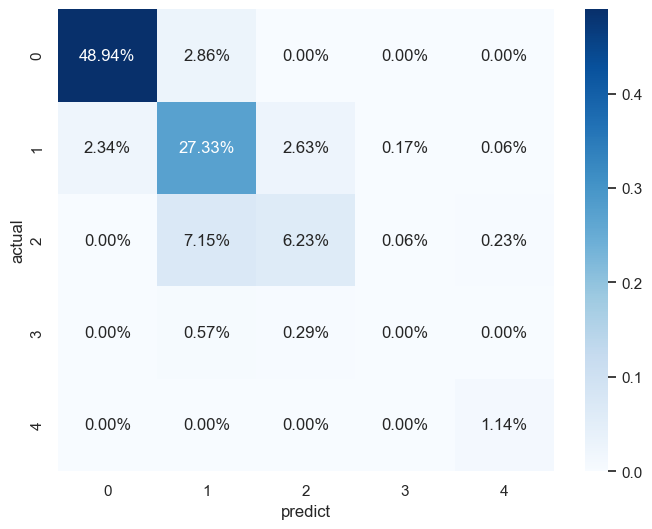

In [42]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('predict')
plt.ylabel('actual')

### Linear regression

Here I have done two linear regression the first using fat as the independant predictor variable 

In [43]:
#Choosing feature for modle
features = df[['fat_g']]
target = df[['calories_100g']]

#test train split
A_train, A_test, B_train, B_test = train_test_split(features, target, test_size=0.2, random_state=1)

 # insatiate and fit the model
model = linear_model.LinearRegression()
model.fit(A_train, B_train)

#predict
y_pred = model.predict(A_test)

#get the wanted errors/values
mse = mean_squared_error(B_test, y_pred)
r2 = r2_score(B_test, y_pred)
mae = mean_absolute_error(B_test, y_pred)

print('R-Squared (R\u00b2): {:.2f}%'.format(r2 * 100))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Mean Absolute Error:{:.2f}'.format(mae))

R-Squared (R²): 67.09%
Mean Squared Error (MSE): 9775.75
Mean Absolute Error:79.89


In [44]:
#getting a prediction
y_pred_test = model.predict(A_test)
y_pred_train = model.predict(A_train)

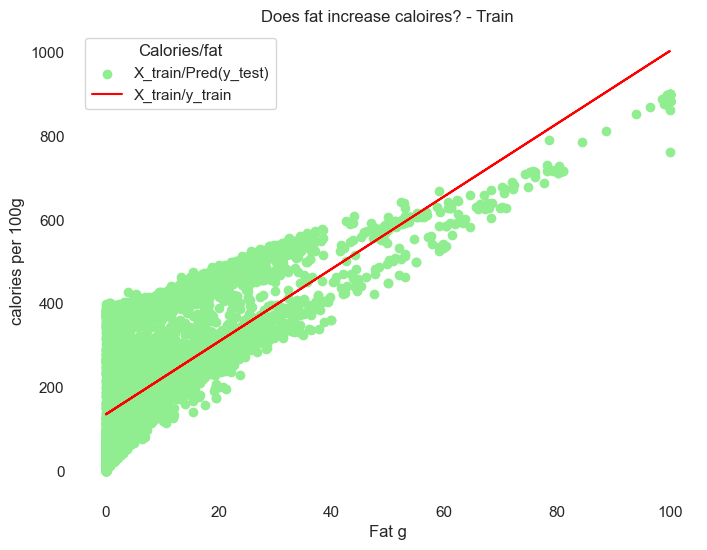

In [45]:
#creating a plot with the training data 
plt.scatter(A_train, B_train, color = 'lightgreen')
plt.plot(A_train, y_pred_train, color = 'red')
plt.title('Does fat increase caloires? - Train')
plt.xlabel('Fat g')
plt.ylabel('calories per 100g')
plt.legend(['X_train/Pred(y_test)', 
            'X_train/y_train'], 
           title = 'Calories/fat', 
           loc='best', 
           facecolor='white')
plt.box(False)
plt.show()

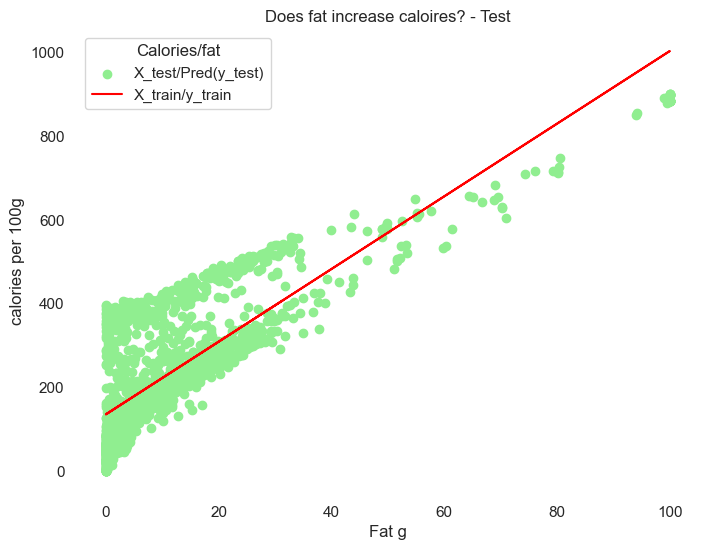

In [46]:
#creating a plot with the testing data 
plt.scatter(A_test, B_test, color = 'lightgreen')
plt.plot(A_train, y_pred_train, color = 'red')
plt.title('Does fat increase caloires? - Test')
plt.xlabel('Fat g')
plt.ylabel('calories per 100g')
plt.legend(['X_test/Pred(y_test)', 
            'X_train/y_train'], 
           title = 'Calories/fat', 
           loc='best', 
           facecolor='white')
plt.box(False)
plt.show()

In [47]:
#getting the intercept and coefficents

print("intercept: or if 0g of fat the calories for the food would be at",model.intercept_)
print("coef: what is each step for each g of fat as it affects the calories",model.coef_)

intercept: or if 0g of fat the calories for the food would be at [135.86217122]
coef: what is each step for each g of fat as it affects the calories [[8.67733]]


### Linear regression - Water

In [48]:
feature_water = df[['water_g']]
target = df[['calories_100g']]

A_train, A_test, B_train, B_test = train_test_split(feature_water, target, test_size=0.2, random_state=1)

model = linear_model.LinearRegression()
model.fit(A_train, B_train)

y_pred = model.predict(A_test)
mse = mean_squared_error(B_test, y_pred)
r2 = r2_score(B_test, y_pred)
mae = mean_absolute_error(B_test, y_pred)

print('R-Squared (R\u00b2): {:.2f}%'.format(r2 * 100))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Mean Absolute Error:{:.2f}'.format(mae))

R-Squared (R²): 80.60%
Mean Squared Error (MSE): 5763.94
Mean Absolute Error:42.80


this has a higher R-sqaured value then the fat and a lower mean squared error then the fat model

In [49]:
y_pred_test = model.predict(A_test)
y_pred_train = model.predict(A_train)

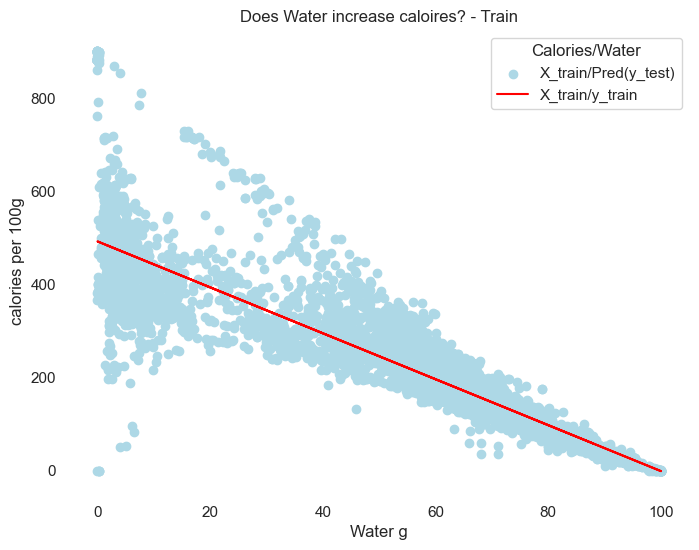

In [50]:
#creating a plot with the training data 
plt.scatter(A_train, B_train, color = 'lightblue')
plt.plot(A_train, y_pred_train, color = 'red')
plt.title('Does Water increase caloires? - Train')
plt.xlabel('Water g')
plt.ylabel('calories per 100g')
plt.legend(['X_train/Pred(y_test)', 
            'X_train/y_train'], 
           title = 'Calories/Water', 
           loc='best', 
           facecolor='white')
plt.box(False)
plt.show()

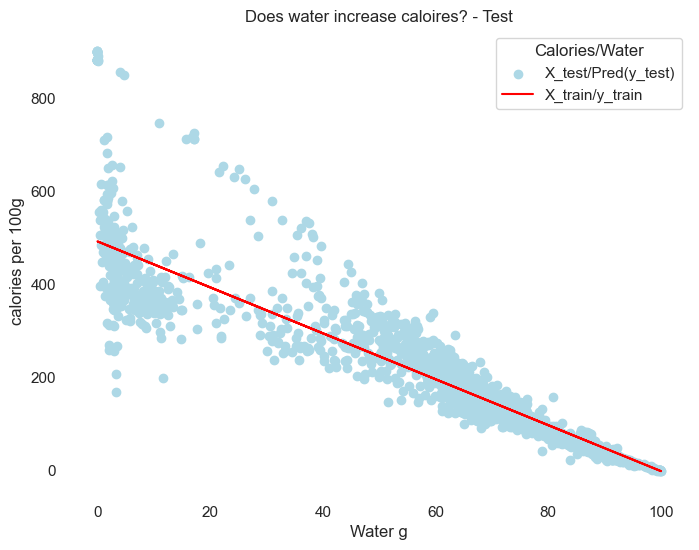

In [51]:
#creating a plot with the testing data 
plt.scatter(A_test, B_test, color = 'lightblue')
plt.plot(A_train, y_pred_train, color = 'red')
plt.title('Does water increase caloires? - Test')
plt.xlabel('Water g')
plt.ylabel('calories per 100g')
plt.legend(['X_test/Pred(y_test)', 
            'X_train/y_train'], 
           title = 'Calories/Water', 
           loc='best', 
           facecolor='white')
plt.box(False)
plt.show()

In [52]:
#getting the intercept and coefficents

print("intercept: or if 0g of water the calories for the food would be at",model.intercept_)
print("coef: what is each step for each g of water as it affects the calories",model.coef_)

intercept: or if 0g of water the calories for the food would be at [492.99565148]
coef: what is each step for each g of water as it affects the calories [[-4.9408706]]


In [53]:
# this has given me the intecept and coefficents for the each feature column
# the columns and coeffiecnest are then zipeped and outputted as a list together

calories = df['calories_100g']
linreg = LinearRegression()
linreg.fit(cols, calories)

print(linreg.intercept_)
list(zip(cols, linreg.coef_))

112.88715617555907


[('protein_g', 2.8798397863784535),
 ('sugars_g', 0.17318918005475167),
 ('carbohydrate_g', 2.6101110359424537),
 ('fat_g', 7.713963974435901),
 ('water_g', -1.1013179547637038)]

In [54]:
#just playing around with get dummies
pd.get_dummies(df['calorie_range'])

,1,2,3,4,5
0,False,True,False,False,False
1,False,False,False,True,False
2,True,False,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
8784,True,False,False,False,False
8785,False,True,False,False,False
8786,False,True,False,False,False
8787,True,False,False,False,False


## Logistic Regression

looking at the data with the calorie range as a ordinal categorical variable 

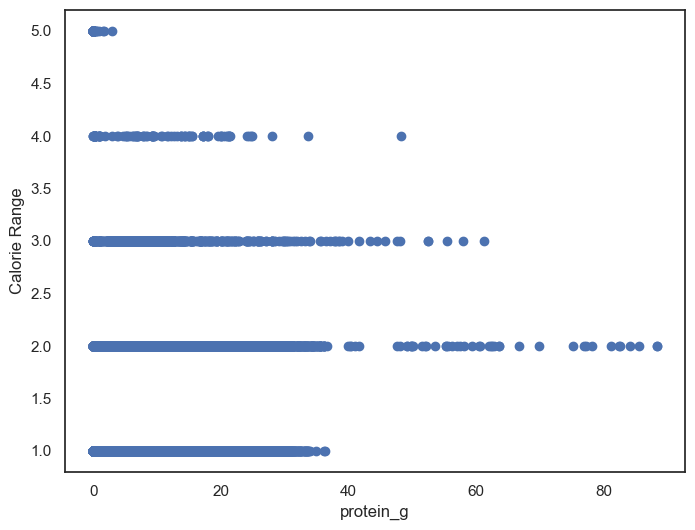

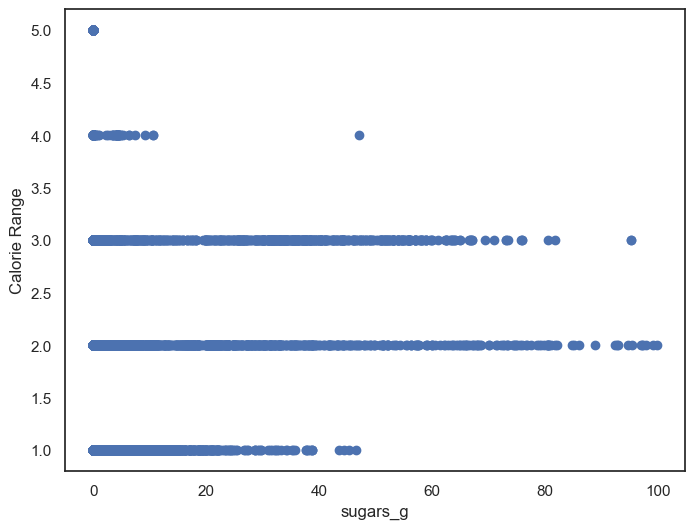

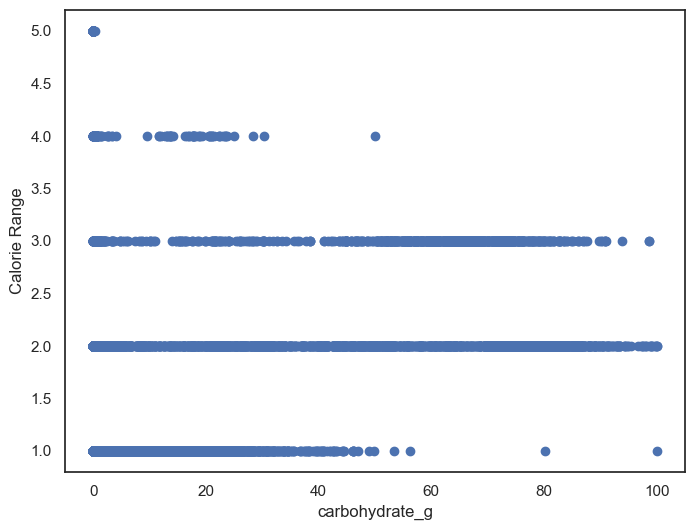

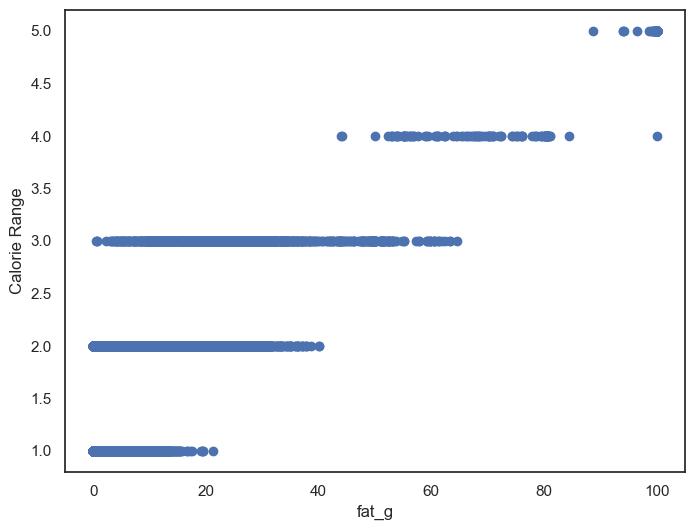

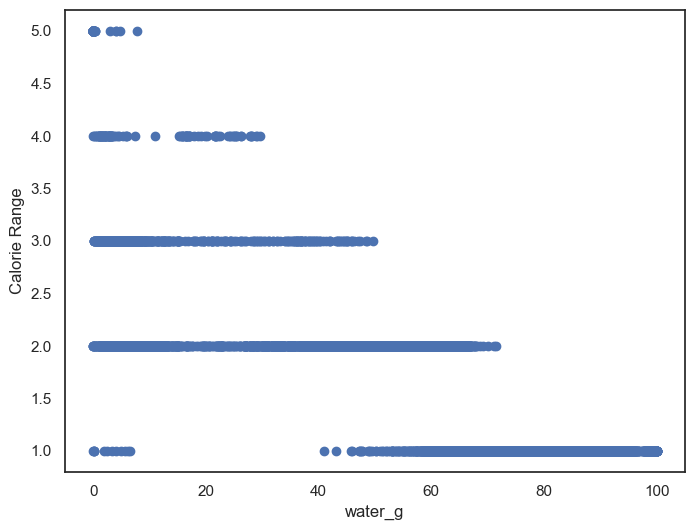

In [77]:
for x in cols:
    plt.scatter(x=cols[x], y= cal_range);
    plt.xlabel(x)
    plt.ylabel('Calorie Range')
    plt.show()

In [56]:
#feature and target
F = cols
C = cal_range

#test train split
X_train,X_test,y_train,y_test=train_test_split(F,C,test_size=0.20, random_state = 12)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the ordinal logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# check accuracy
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9656946826758147


In [57]:
#much like the knn loop this checks the accuracy for each possible combo using logistic regression

# Iterate over each number of features (5, 4, 3, 2, 1)
for num_features in range(5, 0, -1):
    # Generate all possible combos of feature columns
    feature_combinations = itertools.combinations(cols, num_features)
    
    # Iterate over each combo of feature columns
    for feature_combo in feature_combinations:
        # Select the subset of feature columns
        X = df[list(feature_combo)]
        y = df['calorie_range']
        
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
        
        # insatiate and fit the model
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Fit the ordinal logistic regression model
        model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
        model.fit(X_train_scaled, y_train)

        # Predict
        y_pred = model.predict(X_test_scaled)

        # check accuracy
        accuracy = model.score(X_test_scaled, y_test)
        
        # Print accuracy for current iteration
        print(f"Accuracy with {num_features} features {feature_combo}: {accuracy}")


Accuracy with 5 features ('protein_g', 'sugars_g', 'carbohydrate_g', 'fat_g', 'water_g'): 0.9622641509433962
Accuracy with 4 features ('protein_g', 'sugars_g', 'carbohydrate_g', 'fat_g'): 0.9616923956546598
Accuracy with 4 features ('protein_g', 'sugars_g', 'carbohydrate_g', 'water_g'): 0.9342481417953116
Accuracy with 4 features ('protein_g', 'sugars_g', 'fat_g', 'water_g'): 0.9588336192109777
Accuracy with 4 features ('protein_g', 'carbohydrate_g', 'fat_g', 'water_g'): 0.9656946826758147
Accuracy with 4 features ('sugars_g', 'carbohydrate_g', 'fat_g', 'water_g'): 0.9571183533447685
Accuracy with 3 features ('protein_g', 'sugars_g', 'carbohydrate_g'): 0.6918238993710691
Accuracy with 3 features ('protein_g', 'sugars_g', 'fat_g'): 0.7918810748999429
Accuracy with 3 features ('protein_g', 'sugars_g', 'water_g'): 0.8547741566609491
Accuracy with 3 features ('protein_g', 'carbohydrate_g', 'fat_g'): 0.9668381932532876
Accuracy with 3 features ('protein_g', 'carbohydrate_g', 'water_g'): 0.9

## PCA

Principle component analysis

In [58]:
#creating new names for each column ranging from PC1=PC7
pcs_names = []
for i, col in enumerate(new_df):
    pcs_names.append('PC' + str(i+1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']


In [59]:
#normalising the data (not sure how/why this works)
df_norm = (new_df - new_df.mean()) / new_df.std()
print(df_norm)

      calories_100g  calorie_range  protein_g  sugars_g  carbohydrate_g  \
0          0.912301       0.407763  -1.052036 -0.491217        2.539050   
1          2.737868       2.811187  -0.206665 -0.201404       -0.301803   
2         -1.184156      -0.793949  -0.983723 -0.233525       -0.594660   
3          0.829856       0.407763   0.185185 -0.356896        1.873334   
4         -0.483374      -0.793949  -0.972338  1.284161        0.305195   
...             ...            ...        ...       ...             ...   
8784      -0.595264      -0.793949   1.148206 -0.491217       -0.810448   
8785      -0.118261       0.407763   1.730762 -0.491217       -0.810448   
8786       0.299853       0.407763   0.511568 -0.491217       -0.810448   
8787      -0.618819      -0.793949   1.140615 -0.491217       -0.810448   
8788      -0.618819      -0.793949   1.140615 -0.491217       -0.810448   

         fat_g   water_g  
0    -0.662597 -1.490483  
1     3.877985 -1.646584  
2    -0.654390  1.

In [60]:
#specifing the number of components
pca = PCA(n_components=df_norm.shape[1])
pca.fit(df_norm)
df_pca = pd.DataFrame(pca.transform(df_norm),columns = pcs_names)
print(df_pca)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7
0     1.870572  1.677773  0.231875 -2.235011  0.184987 -0.229943  0.062388
1     4.683036 -2.787629 -1.864694  0.257505  0.219256  0.128878 -0.115265
2    -2.036687  0.622503 -0.893065  0.074272 -0.189948  0.020157 -0.026657
3     1.671512  0.772124  1.057335 -1.559002  0.128735 -0.095169  0.029050
4    -0.555575  1.708762 -0.363074  0.729809  0.314447 -0.043055  0.002593
...        ...       ...       ...       ...       ...       ...       ...
8739 -1.521672 -0.787081  0.866520  0.242551  0.101444 -0.017049 -0.015769
8740 -0.405284 -1.490934  1.139109  0.306156 -0.585046  0.008027  0.004008
8741  0.120483 -1.380224 -0.234551  0.243958 -0.086784 -0.029307  0.007801
8742 -1.557749 -0.768037  0.864700  0.242689  0.077061 -0.026108 -0.018418
8743 -1.557749 -0.768037  0.864700  0.242689  0.077061 -0.026108 -0.018418

[8744 rows x 7 columns]


In [61]:
df_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,8.744000e+03,8.744000e+03,8744.000000,8.744000e+03,8.744000e+03,8.744000e+03,8.744000e+03
mean,1.300170e-17,-3.900509e-17,0.000000,-1.300170e-17,-2.884752e-17,-3.717673e-17,-5.434303e-18
std,1.964519e+00,1.306931e+00,0.940095,6.806430e-01,2.701940e-01,9.052572e-02,6.588184e-02
min,-2.370496e+00,-4.023466e+00,-3.612326,-2.425107e+00,-9.161728e-01,-2.299432e-01,-1.164122e+00
25%,-1.549266e+00,-9.094458e-01,-0.676986,-2.270392e-01,-1.832898e-01,-3.209249e-02,-1.794268e-02
50%,-8.287391e-01,3.393710e-01,-0.006026,1.496265e-01,3.212155e-03,-8.559331e-03,-1.674570e-03
75%,1.359958e+00,7.413799e-01,0.650546,2.949755e-01,2.048746e-01,1.574150e-02,1.363906e-02
max,6.303910e+00,5.533679e+00,6.435737,3.524111e+00,1.038488e+00,2.299166e+00,1.226156e+00


[Text(0.5, 0, 'number of PC'),
 Text(0, 0.5, 'explained variance or eigan value')]

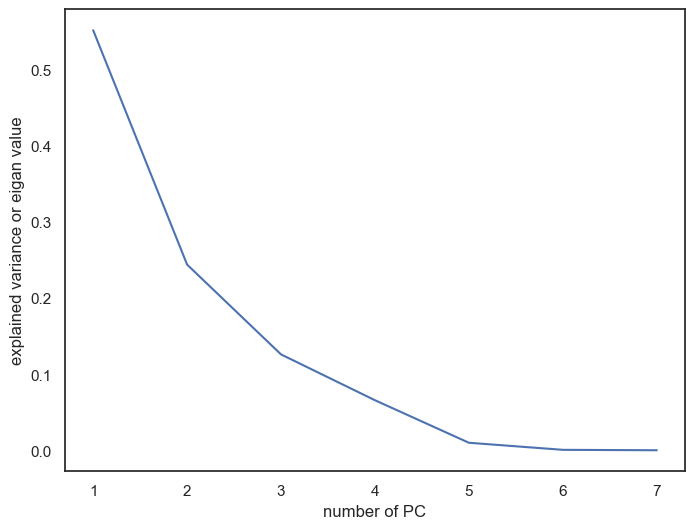

In [62]:
#creating a scree plot with the range being the number of components used
fig = sns.lineplot(y = pca.explained_variance_ratio_, x = range(1,8))
fig.set(xlabel='number of PC',ylabel='explained variance or eigan value')

In [63]:
#selecting the fewest components
for pc, var in zip(pcs_names,np.cumsum(pca.explained_variance_ratio_)):
   print(pc,var)

PC1 0.5513338277391759
PC2 0.7953436828050054
PC3 0.9215978550757398
PC4 0.9877799843839951
PC5 0.9982092395713955
PC6 0.9993799404218282
PC7 1.0


In [64]:
#rotaing the data?
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = new_df.columns)
print(rotation)

                     PC1       PC2       PC3       PC4       PC5       PC6  \
calories_100g   0.492207 -0.178913 -0.011412 -0.030826  0.273756 -0.621148   
calorie_range   0.476208 -0.179084 -0.140619 -0.008037 -0.848014  0.043052   
protein_g      -0.009641 -0.473679  0.823094  0.192779 -0.043922 -0.098712   
sugars_g        0.252271  0.504046  0.103664  0.819235  0.011125  0.016777   
carbohydrate_g  0.336399  0.503587  0.213090 -0.435176  0.048174 -0.298023   
fat_g           0.349041 -0.447655 -0.418443  0.213259  0.375501  0.112490   
water_g        -0.481904 -0.059068 -0.267139  0.236259 -0.246078 -0.707689   

                     PC7  
calories_100g   0.513687  
calorie_range  -0.018289  
protein_g      -0.221841  
sugars_g       -0.000344  
carbohydrate_g -0.554358  
fat_g          -0.550950  
water_g        -0.275172  


In [65]:
#creating components
df_reduced = df_pca.iloc[:,0:2]
print(df_reduced)

           PC1       PC2
0     1.870572  1.677773
1     4.683036 -2.787629
2    -2.036687  0.622503
3     1.671512  0.772124
4    -0.555575  1.708762
...        ...       ...
8739 -1.521672 -0.787081
8740 -0.405284 -1.490934
8741  0.120483 -1.380224
8742 -1.557749 -0.768037
8743 -1.557749 -0.768037

[8744 rows x 2 columns]


In [66]:
elbow = [i * 100 for i in list(pca.explained_variance_ratio_)][0:3]
df_elbow = (range(1,4), elbow)
df_elbow 

(range(1, 4), [55.133382773917596, 24.40098550658295, 12.625417227073434])

In [67]:
eigen = [i * 100 for i in list(pca.explained_variance_ratio_)][0:7]
df_eigen = (range(1,8), eigen)
df_eigen 

(range(1, 8),
 [55.133382773917596,
  24.40098550658295,
  12.625417227073434,
  6.618212930825525,
  1.0429255187400444,
  0.11707008504326805,
  0.062005957817180886])

In [68]:
#the elbow and eigen value are both positive which is good
tot_elbow = sum(map(sum, df_elbow))
tot_eigen = sum(map(sum, df_eigen))
print('total elbow : ', tot_elbow)
print('total eigen : ', tot_eigen)

total elbow :  98.15978550757399
total eigen :  128.0


In [69]:
#running a linear regression using PCA

#features/targets
F = cols
C = cal_range

# train test split
X_train, X_test, y_train, y_test = train_test_split(F, C, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5) #this value i got from the skree plot bend
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# prediction
y_pred = model.predict(X_test_pca)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R-Squared (R²): {:.2f}%'.format(r2 * 100))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))

R-Squared (R²): 90.63%
Mean Squared Error (MSE): 0.07
Mean Absolute Error (MAE): 0.22


<a id="9"></a>
# <p style="background-color:#81C784;font-family:arial;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">CONCLUSION</p>

In conclusion this exploration and use of models to predict calorie values of foods found that fat and water had the greatest correlation with calories. KNN was found be the most accurate model to predict with 97% accuracy.